<div style="background-color: #FFFFFF; color: black; padding: 11px;">
<h1 style="font-size: 25px;">DATA SCIENCE</h1>
<h2 style="font-size: 20px;">MATHEMATICS AND MULTIVARIATE STATISTICS - SoSe 24</h2>
<i>BERRANUR CANBEY</i>
</div>


<div style="background-color: #FFFF99; color: black; padding: 10px;">

# Task 1 - Story

**1. Context:** In a health center, a project is to be carried out based on some information collected from patients who have applied to the health center for various reasons in the last 1 year. With the information received from 374 patients in total, it is intended to reveal meaningful data, analyze the data and offer a paid training package to patients or clients interested in this subject according to the results. The results are critical for determining the factors affecting sleep health, and therefore for the topics to be focused on in the training package. In this project, we will examine the relationships between various variables, including sleep routines, daily habits and some physical characteristics, and try to determine which factors are more likely to trigger sleep problems.

**2. Experiment plan:** First, the dataset will be loaded and examined, then appropriate clustering methods will be selected and cluster analysis will be performed on the dataset. The results will provide valuable information to develop the appropriate training package. Next, a dimensionality reduction method using PCA will be tested and the results obtained will be evaluated.

**3. The value I expect to create for the organization:** As a result of this project, I aim to provide valuable insights for the health center. The results of the cluster analysis will be used to classify patients into different groups and develop the most appropriate training package. This will be an important step to improve the health center's services, optimize patients' sleep health and consequently increase trust in the health center.  Thus, the health center can gain a competitive advantage by providing better services to patients and improve overall health outcomes.

<div style="background-color: #FFD1DC; color: black; padding: 10px;">

# Task 2 - The Data

##### **Data:** https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset/data 
##### The Sleep Health and Lifestyle Dataset consists of 374 rows and 13 columns covering a wide range of variables related to sleep and daily habits.

In [2]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

dataset = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")

display(dataset.head())

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [3]:
display(dataset.tail())

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
373,374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [4]:
print(dataset.shape)

(374, 13)


In [5]:
print(dataset.columns)

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')


<div style="background-color: #FFD1DC; color: black; padding: 10px;">

**KEY FEATURES OF THE DATASET**
- **Comprehensive Sleep Metrics:** Explore sleep duration, quality, and factors influencing sleep patterns.
- **Lifestyle Factors:** Analyze physical activity levels, stress levels, and BMI categories.
- **Cardiovascular Health:** Examine blood pressure and heart rate measurements.
- **Sleep Disorder Analysis:** Identify the occurrence of sleep disorders such as Insomnia and Sleep Apnea.

**DATASET COLUMNS**
- **Person ID:** An identifier for each individual.
- **Gender:** The gender of the person (Male/Female).
- **Age:** The age of the person in years.
- **Occupation:** The occupation or profession of the person.
- **Sleep Duration (hours):** The number of hours the person sleeps per day.
- **Quality of Sleep (scale: 1-10):** A subjective rating of the quality of sleep, ranging from 1 to 10.
- **Physical Activity Level (minutes/day):** The number of minutes the person engages in physical activity daily.
- **Stress Level (scale: 1-10):** A subjective rating of the stress level experienced by the person, ranging from 1 to 10.
- **BMI Category:** The BMI category of the person (e.g., Underweight, Normal, Overweight, Obese).
- **Blood Pressure (systolic/diastolic):** The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.
- **Heart Rate (bpm):** The resting heart rate of the person in beats per minute.
- **Daily Steps:** The number of steps the person takes per day.
- **Sleep Disorder:** The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).

<div style="background-color: #FFD1DC; color: black; padding: 10px;">

According to the article (https://www.mdpi.com/1660-4601/18/12/6626), exercise and sleep are both important health behaviors in adults across the lifespan and evidence for a reciprocal relationship exists in older adults. Evidence suggests that increased activity levels in older adults improves sleep quality and is protective against both incident and chronic insomnia. Further, middle-aged adults who engaged in higher levels of moderate to vigorous physical activity were less likely to report a sleep disorder diagnosis compared with those who were less active.

**How the dataset is suitable for the project from Task 1? :** According to the argument above, it is possible to make some inferences by associating the Age, Physical Activity Level and Sleep Disorder data in the dataset with each other. In line with the inferences made, it can be ensured that the training package can be prepared in a way that can appeal to different age groups.

<div style="background-color: #98FB98DC; color: black; padding: 10px;">
 
 # Task 3 - IDA (Initial Data Analysis)

<div style="background-color: #98FB98DC; color: black; padding: 10px;">

- For numeric columns some basic statistics (mean, standart deviation, minimum, maximum etc.) : 

In [6]:
dataset.describe().T 

,count,mean,std,min,25%,50%,75%,max
Person ID,374.0,187.500000,108.108742,1.0,94.25,187.5,280.75,374.0
Age,374.0,42.184492,8.673133,27.0,35.25,43.0,50.00,59.0
Sleep Duration,374.0,7.132086,0.795657,5.8,6.40,7.2,7.80,8.5
Quality of Sleep,374.0,7.312834,1.196956,4.0,6.00,7.0,8.00,9.0
Physical Activity Level,374.0,59.171123,20.830804,30.0,45.00,60.0,75.00,90.0
Stress Level,374.0,5.385027,1.774526,3.0,4.00,5.0,7.00,8.0
Heart Rate,374.0,70.165775,4.135676,65.0,68.00,70.0,72.00,86.0
Daily Steps,374.0,6816.844920,1617.915679,3000.0,5600.00,7000.0,8000.00,10000.0


<div style="background-color: #98FB98DC; color: black; padding: 10px;">

- Display of data types of columns and missing values in columns :

In [7]:

dataset.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


<div style="background-color: #b0e0e6; color: black; padding: 10px;">
 
 # Task 5 - EDA and Preprocessing 

<div style="background-color: #b0e0e6; color: black; padding: 10px;">

- The first column (Person ID) seems to be an index column. Since data frames create a default index, we can drop this column.

In [8]:
dataset.drop(columns=["Person ID"], inplace=True)

<div style="background-color: #b0e0e6; color: black; padding: 10px;">

- The values for the Blood Pressure column must be a numeric expression. Because the mean blood pressure measurement of the person, indicated as [Systolic B.P. + (2 x Dystolic B.P.)] / 3.  

- However, we see that when reading the data set, the type of data belonging to this column is specified as object. In other words only two values are shown with a division sign between them. In this step, after separating the systolic and dystolic values, we will create a new column specifying the Mean Blood Pressure(MBP). Then we can remove unnecessary columns.


In [9]:
dataset[['systolic', 'dystolic']] = dataset['Blood Pressure'].str.split('/', expand=True)
dataset.drop(columns=['Blood Pressure'], inplace=True)

# setting the data type of the new columns to numeric
dataset['systolic'] = pd.to_numeric(dataset['systolic'])
dataset['dystolic'] = pd.to_numeric(dataset['dystolic'])

# creating the new column showing the MBP
dataset['MBP'] = ((dataset['systolic'] + (2 * dataset['dystolic'])) / 3).round(2)

dataset.drop(columns=['systolic','dystolic' ], inplace=True)



<div style="background-color: #b0e0e6; color: black; padding: 10px;">

- Replace 'None' values in the 'Sleep Disorder' column with 'No Sleep Disorder' for clarity and consistency in the dataset.

In [10]:
dataset['Sleep Disorder'] = dataset['Sleep Disorder'].fillna('No Sleep Disorder')

display(dataset.head())

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,MBP
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,No Sleep Disorder,97.33
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,No Sleep Disorder,95.00
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,No Sleep Disorder,95.00
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,106.67
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,106.67


<div style="background-color: #b0e0e6; color: black; padding: 10px;">

- When we examine the current version of the dataset, we observe that there are no NaN values in any column or row. We also make sure that the data types are compatible with the values in the columns.

In [11]:
dataset.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Heart Rate               374 non-null    int64  
 9   Daily Steps              374 non-null    int64  
 10  Sleep Disorder           374 non-null    object 
 11  MBP                      374 non-null    float64
dtypes: float64(2), int64(6), object(4)
memory usage: 35.2+ KB


<div style="background-color: #b0e0e6; color: black; padding: 10px;">

- In the BMI Category column, there are two different expressions, 'Normal Weight' and 'Normal', even though they specify the same weight range. We fix the confusion by updating all of them to 'Normal'.

In [12]:
dataset['BMI Category'] = dataset['BMI Category'].replace('Normal Weight', 'Normal')

print(dataset['BMI Category'].unique())

['Overweight' 'Normal' 'Obese']


<div style="background-color: #b0e0e6; color: black; padding: 10px;">

- I checked unique and non-unique columns with the help of .nununique() 

In [13]:
dataset.nunique()

Gender                      2
Age                        31
Occupation                 11
Sleep Duration             27
Quality of Sleep            6
Physical Activity Level    16
Stress Level                6
BMI Category                3
Heart Rate                 19
Daily Steps                20
Sleep Disorder              3
MBP                        25
dtype: int64

###  **5.1**

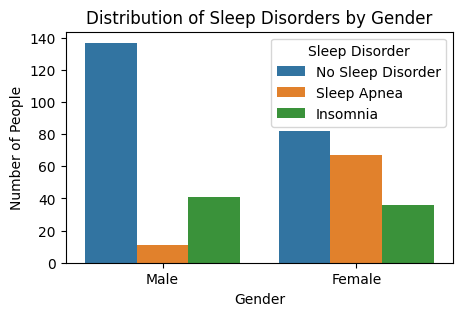

In [14]:
plt.figure(figsize=(5, 3))
sns.countplot(x='Gender', hue='Sleep Disorder', data=dataset)
plt.title('Distribution of Sleep Disorders by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of People')
plt.legend(title='Sleep Disorder')
plt.show()

<div style="background-color: #b0e0e6; color: black; padding: 10px;">

### Thanks to the bar chart 5.2, we can observe which sleep disorders are more common in which occupational groups:

- It has been observed that occupational groups such as accountant, doctor, engineer and lawyer mostly do not have any sleep problems.

- While Sleep Apnea is observed in a large number of nurses, Insomnia is predominant in salesperson and teacher occupational groups.

###  **5.2**

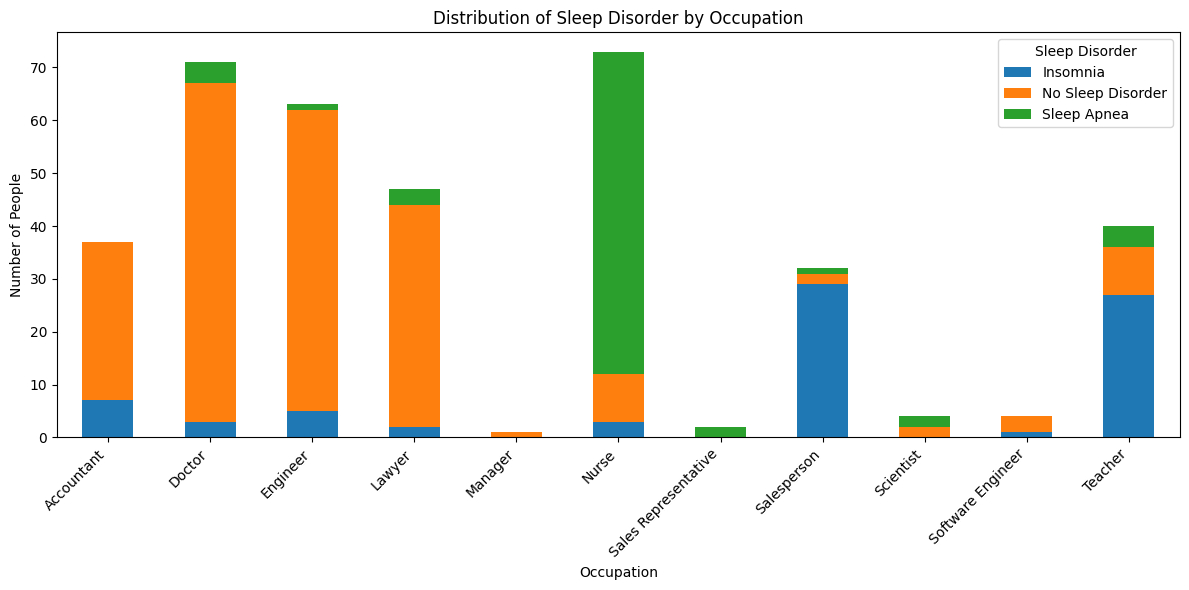

In [15]:
Distribution_sleep_disorder = dataset.groupby(['Occupation', 'Sleep Disorder']).size().unstack()

Distribution_sleep_disorder.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Distribution of Sleep Disorder by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Number of People')
plt.xticks(rotation=45, ha='right') 
plt.legend(title='Sleep Disorder')
plt.tight_layout()
plt.show()

<div style="background-color: #b0e0e6; color: black; padding: 10px;">

### Thanks to the bar chart 5.3, we can observe which BMI Category are more common in which occupational groups:

- In the previous graph, we observed that nurse, salesperson and teacher occupational groups have various sleep disorders. According to the graph below, we can see that people in these occupational groups are mostly in the Overweight category. In occupational groups where people with normal weight levels are in the majority, according to the graph above, people who do not have sleep problems are in the majority.

**Comment:** Occupational groups can have a determining effect on people's routines and weight. Therefore, they can be triggers for various sleep problems. 

###  **5.3**

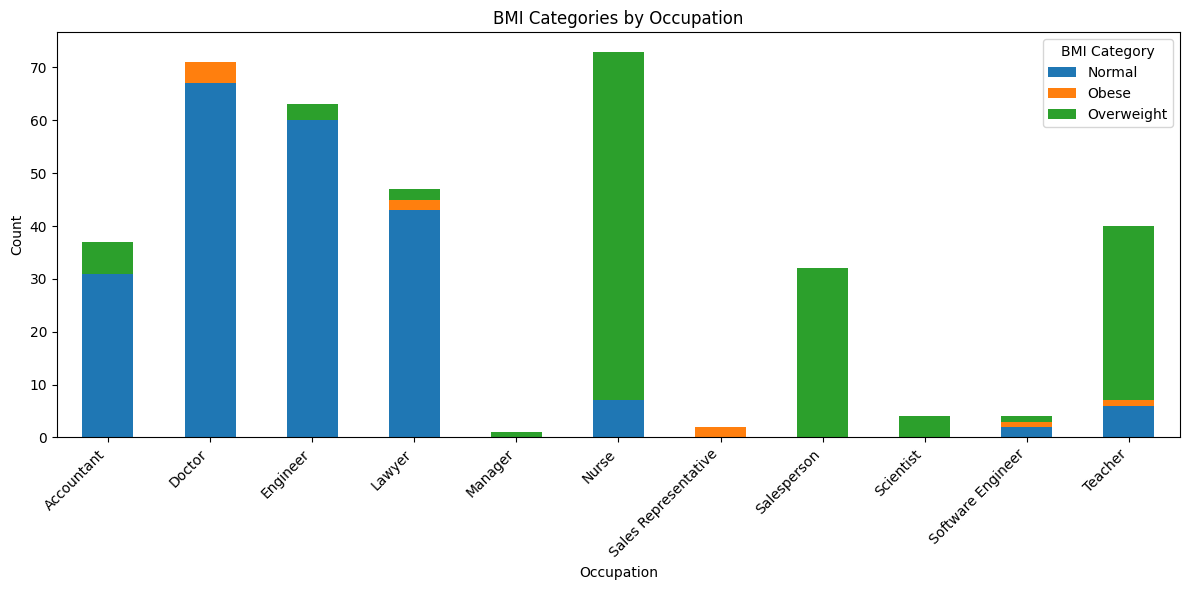

In [16]:
bmi_categories = dataset.groupby(['Occupation', 'BMI Category']).size().unstack()

bmi_categories.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('BMI Categories by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='BMI Category')
plt.tight_layout()
plt.show()

<div style="background-color: #b0e0e6; color: black; padding: 10px;">

- Boxplot 5.4 showing that the mean blood pressure in people in the Normal BMI Category is around 95 and that the MBP value increases in proportion to weight gain: 

###  **5.4**

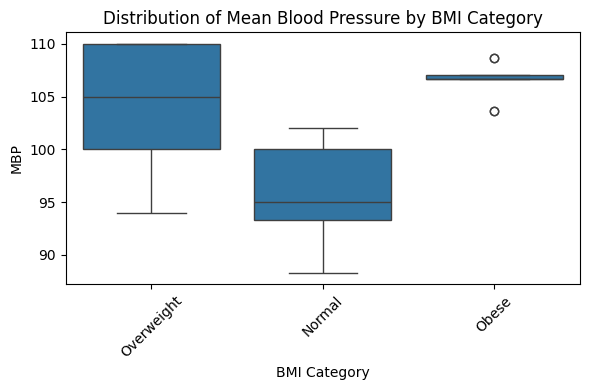

In [17]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='BMI Category', y='MBP', data=dataset)

plt.title('Distribution of Mean Blood Pressure by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('MBP')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

<div style="background-color: #b0e0e6; color: black; padding: 10px;">

- The bar graphs 5.5 show that stress level affects sleep duration and sleep quality variables in a similar way:

###  **5.5**

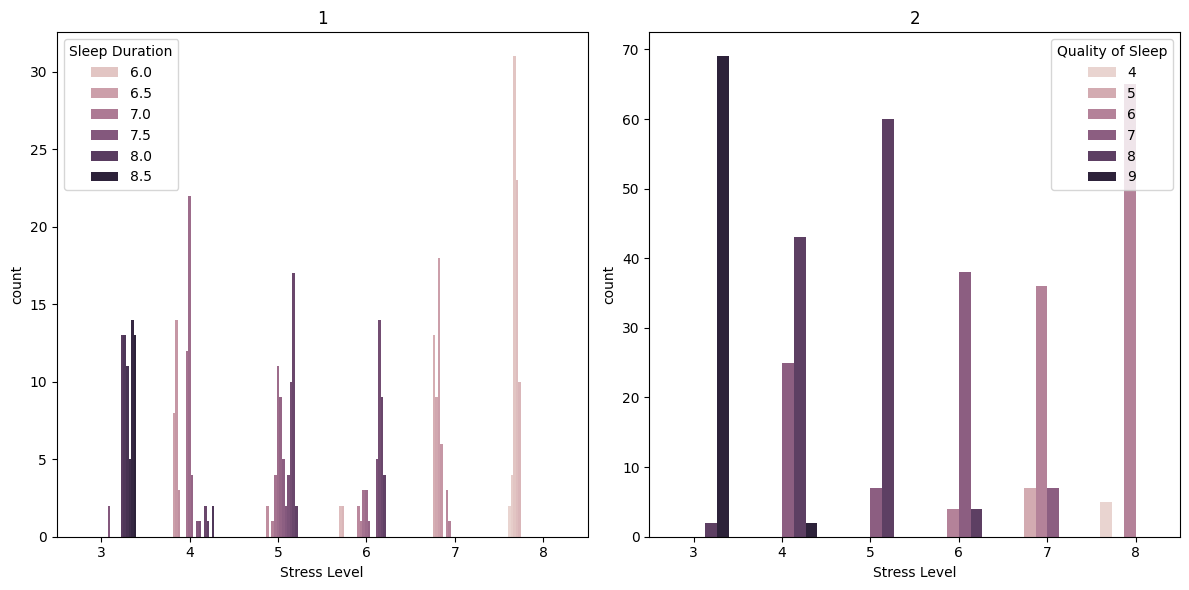

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.countplot(x="Stress Level", hue="Sleep Duration", data=dataset, ax=axes[0])
axes[0].set_title('1')

sns.countplot(x="Stress Level", hue="Quality of Sleep", data=dataset, ax=axes[1])
axes[1].set_title('2')

plt.tight_layout()
plt.show()

###  **5.6**

<Axes: >

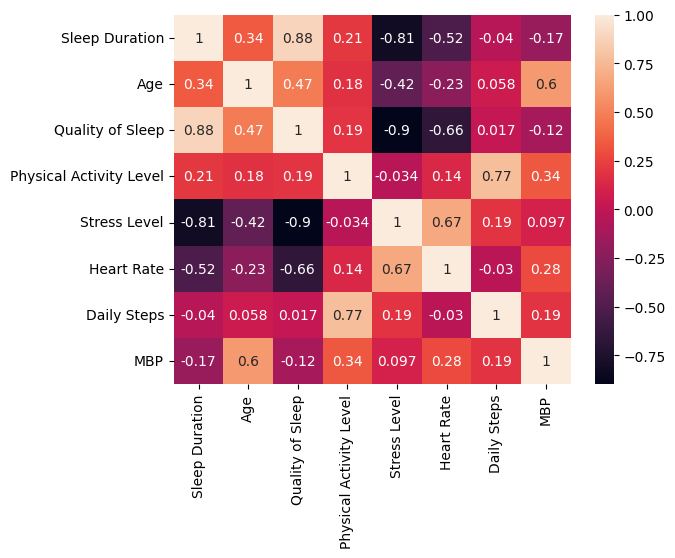

In [19]:
df_numerical= dataset[['Sleep Duration','Age','Quality of Sleep', 'Physical Activity Level','Stress Level','Heart Rate','Daily Steps','MBP']]

correlation_matrix= df_numerical.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)

We can observe the correlation of columns with numeric features in the original dataset in the 5.6.

  <li>There is a strong positive relationship between Sleep Duration and Sleep Quality (0.88).</li>
  <li>There is a strong positive relationship between Daily Steps and Physical Act. Level (0.77).</li>
  <li>There is a strong positive relationship between Heart Rate and Stress Level (0.67).</li>

###  **5.7**

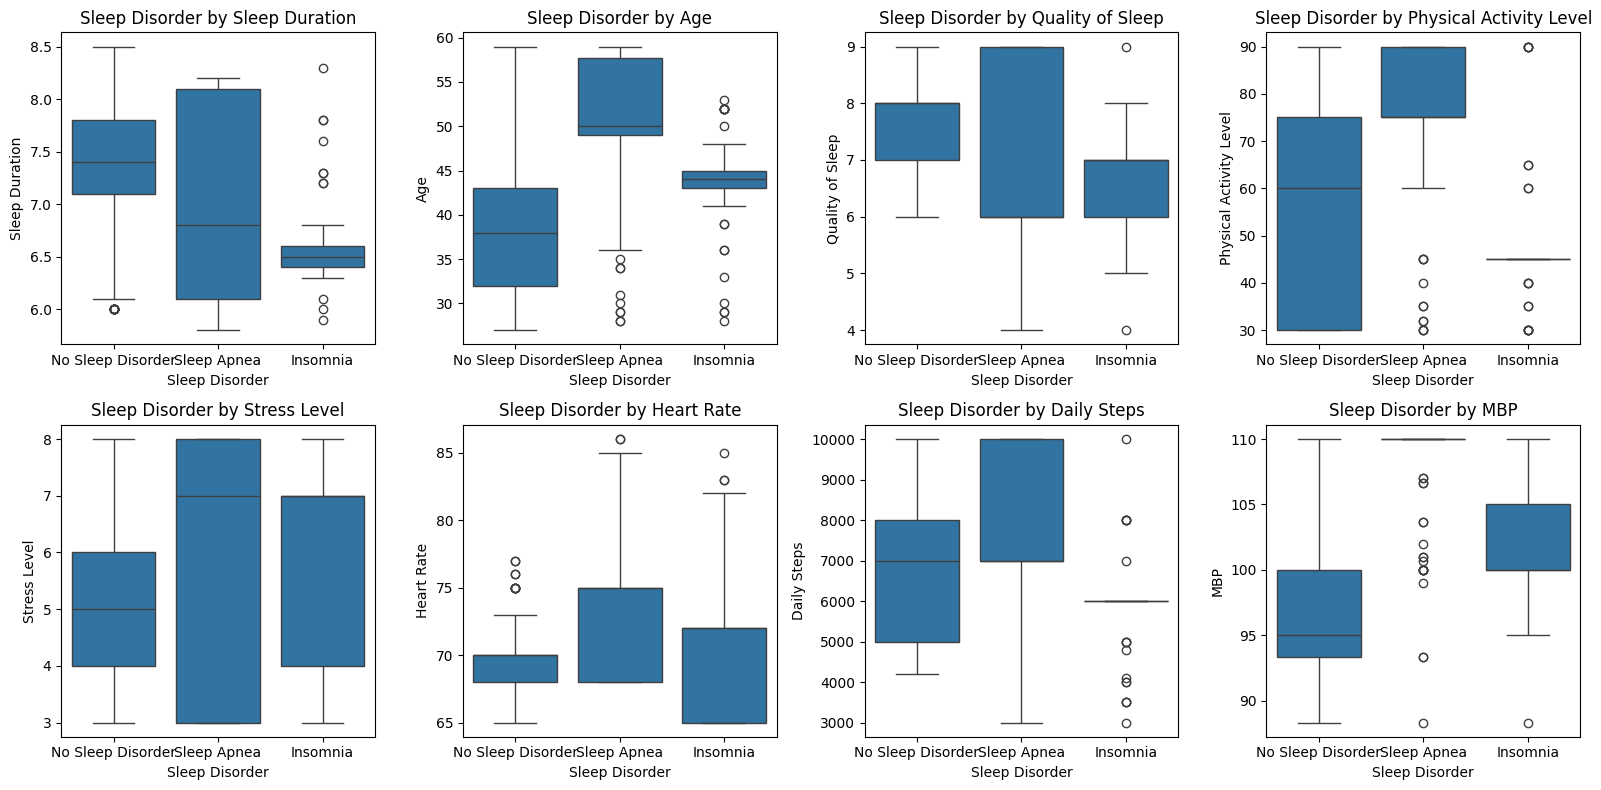

In [20]:
num_rows = 2
num_columns = 4

fig, axs = plt.subplots(num_rows, num_columns, figsize=(16, 8))

# Creating boxplot to observe each numeric feature and Sleep Disorder relationship

for i, feature in enumerate(df_numerical):
    row = i // num_columns
    col = i % num_columns
    sns.boxplot(x='Sleep Disorder', y=feature, data=dataset, ax=axs[row, col])
    axs[row, col].set_title('Sleep Disorder by {}'.format(feature))
    axs[row, col].set_xlabel('Sleep Disorder')
    axs[row, col].set_ylabel(feature)

plt.tight_layout()
plt.show()

<div style="background-color: #b0e0e6; color: black; padding: 10px;">

- Finally, in this step, I used the Custom Mapping method to map the data of some categorical columns to numeric values. This is a method that can be used when there is no specific ordering between categories. 

- Since there are 11 unique values in the Occupation column, I decided to remove this column from the dataset. I have already examined the relationship between occupations and other variables in detail in the previous steps.

- In the boxplot in 5.4, I observed that the MBP value increases in direct proportion to weight. I found it appropriate to remove this column to make the dataset more efficient in future analyses.

In [21]:
mapping = {'Insomnia': 1, 'Sleep Apnea': 2, 'No Sleep Disorder': 0}
dataset['Sleep Disorder'] = dataset['Sleep Disorder'].map(mapping)

mapping = {'Overweight': 1, 'Obese': 2, 'Normal': 0}
dataset['BMI Category'] = dataset['BMI Category'].map(mapping)

mapping = {'Male': 1, 'Female': 2}
dataset['Gender'] = dataset['Gender'].map(mapping)

dataset.drop(columns=["Occupation"], inplace=True)
dataset.drop(columns=["MBP"], inplace=True)

<div style="background-color: #b0e0e6; color: black; padding: 10px;">

- Some statistical properties according to the most recent version of the columns:

In [22]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,374.0,1.494652,0.500641,1.0,1.00,1.0,2.0,2.0
Age,374.0,42.184492,8.673133,27.0,35.25,43.0,50.0,59.0
Sleep Duration,374.0,7.132086,0.795657,5.8,6.40,7.2,7.8,8.5
Quality of Sleep,374.0,7.312834,1.196956,4.0,6.00,7.0,8.0,9.0
Physical Activity Level,374.0,59.171123,20.830804,30.0,45.00,60.0,75.0,90.0
Stress Level,374.0,5.385027,1.774526,3.0,4.00,5.0,7.0,8.0
BMI Category,374.0,0.449198,0.549274,0.0,0.00,0.0,1.0,2.0
Heart Rate,374.0,70.165775,4.135676,65.0,68.00,70.0,72.0,86.0
Daily Steps,374.0,6816.844920,1617.915679,3000.0,5600.00,7000.0,8000.0,10000.0
Sleep Disorder,374.0,0.622995,0.808537,0.0,0.00,0.0,1.0,2.0


##  Scailing


In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

dataset_scaled = scaler.fit_transform(dataset)
dataset_scaled = pd.DataFrame(dataset_scaled, index=dataset.index, columns=dataset.columns)
dataset_scaled = dataset_scaled.sort_index()
dataset_scaled.round(2)

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder
0,0.0,0.00,0.11,0.4,0.20,0.6,0.5,0.57,0.17,0.0
1,0.0,0.03,0.15,0.4,0.50,1.0,0.0,0.48,1.00,0.0
2,0.0,0.03,0.15,0.4,0.50,1.0,0.0,0.48,1.00,0.0
3,0.0,0.03,0.04,0.0,0.00,1.0,1.0,0.95,0.00,1.0
4,0.0,0.03,0.04,0.0,0.00,1.0,1.0,0.95,0.00,1.0
...,...,...,...,...,...,...,...,...,...,...
369,1.0,1.00,0.85,1.0,0.75,0.0,0.5,0.14,0.57,1.0
370,1.0,1.00,0.81,1.0,0.75,0.0,0.5,0.14,0.57,1.0
371,1.0,1.00,0.85,1.0,0.75,0.0,0.5,0.14,0.57,1.0
372,1.0,1.00,0.85,1.0,0.75,0.0,0.5,0.14,0.57,1.0


In [24]:
dataset_scaled.head()

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder
0,0.0,0.00000,0.111111,0.4,0.2,0.6,0.5,0.571429,0.171429,0.0
1,0.0,0.03125,0.148148,0.4,0.5,1.0,0.0,0.476190,1.000000,0.0
2,0.0,0.03125,0.148148,0.4,0.5,1.0,0.0,0.476190,1.000000,0.0
3,0.0,0.03125,0.037037,0.0,0.0,1.0,1.0,0.952381,0.000000,1.0
4,0.0,0.03125,0.037037,0.0,0.0,1.0,1.0,0.952381,0.000000,1.0


<div style="background-color: #e0bbff; color: black; padding: 10px;">
 
 # Task 6 - Clustering

## DBSCAN

- As first clustering method I chose, I determined the epsilon and min_samples values for the DBSCAN algorithm to be applied. While determining the cluster labels, I tried to assign the most appropriate epsilon and min_samples values to avoid outliers. But there are still some outliers.

In [25]:
from sklearn.cluster import DBSCAN

epsilon = 0.8
min_samples = 20

dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
dbscan_labels = dbscan.fit_predict(dataset_scaled)

print(dbscan_labels)

[ 0  0  0 -1 -1  0  0  0  0  0  0  0  0  0  0  0 -1  0 -1  0  0  0  0  0
  0  0  0  0  0  0 -1 -1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  0  0
  0  0  0  0  0  0  0  0 -1 -1  0  0  0  1  0  0  0  0  0  0  0 -1  1  1
  1  1  1  1  1  1  1  0  1  0  1  0  0  0  1  0  1  0  1  1  1  1  1  1
  1  1  1  1  1  1  0  1  0  0  1  0  0  1  0  0  1  0  1  0  1  0  1  1
  0 -1  0  0  1  1  1  0  0  0  0  0  0  0  0  0  0  1  1  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  0  1  0  1  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  1  0  0  0  1  0  1  0  1  0  1  0  1  0  1  0  0  1  0  0
  1  0  0  1  0  1  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 -1  2 -1  2  2  2  2  2  2  2  2  2 -1 -1  2  3  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  3  3  3  3  1  2  2  2  1  1  1  1  1  1
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3

- Distribution of the data set in the 2D graph according to the DBSCAN clustering algorithm 

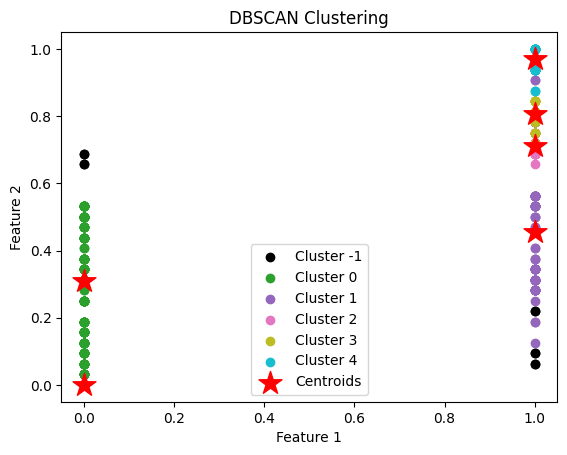

In [26]:
import matplotlib.pyplot as plt
import numpy as np

dbscan_labels = dbscan.fit_predict(dataset_scaled)

unique_labels = np.unique(dbscan_labels)

colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))

for label, color in zip(unique_labels, colors):
    if label == -1:
        color = 'black'  
    
    cluster_points = dataset_scaled[dbscan_labels == label].values 
    
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=color, label=f'Cluster {label}')

cluster_centers = np.zeros((len(unique_labels), dataset_scaled.shape[1]))
for i, label in enumerate(unique_labels):
    if label != -1:
        cluster_centers[i] = np.mean(dataset_scaled[dbscan_labels == label], axis=0)

plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='*', s=300, c='red', label='Centroids')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering')
plt.legend()
plt.show()

- This visualization is useful for understanding how instances in the dataset are grouped in three-dimensional space and where each cluster is located.

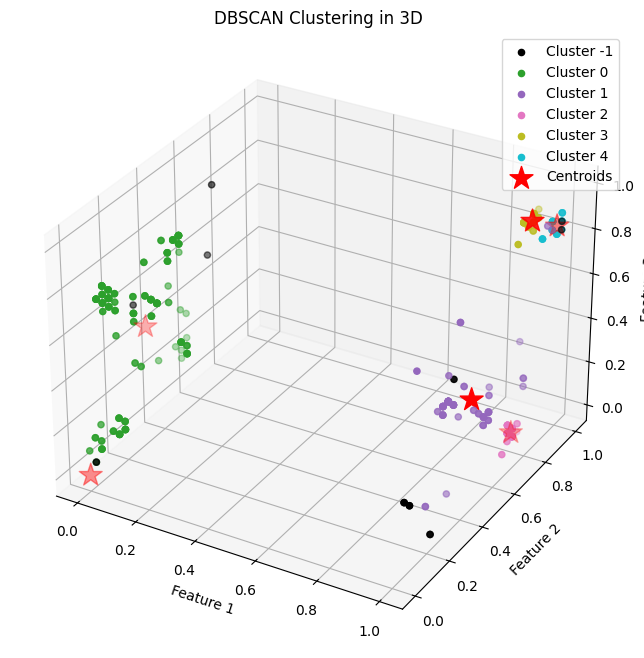

In [27]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))

for label, color in zip(unique_labels, colors):
    if label == -1:
        color = 'black' 
    
    cluster_points = dataset_scaled[dbscan_labels == label].values  
    
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], color=color, label=f'Cluster {label}')

ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1], cluster_centers[:, 2], marker='*', s=300, c='red', label='Centroids')

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')

plt.title('DBSCAN Clustering in 3D')
plt.legend()

plt.show()

- The bar chart showing the size and distribution of clusters 

dbscan_labels
-1     16
 0    182
 1     82
 2     32
 3     32
 4     30
dtype: int64


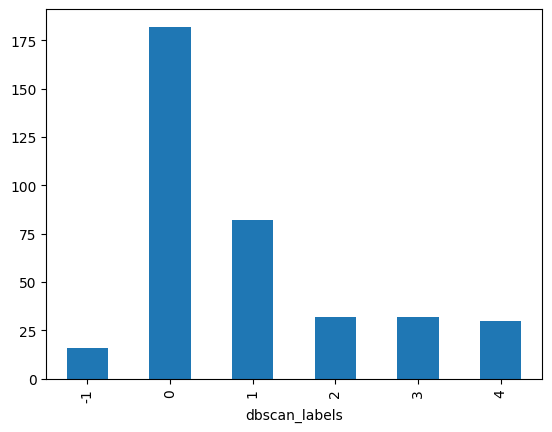

In [28]:
dbscan_labels = dbscan.fit_predict(dataset_scaled)
dataset_scaled["dbscan_labels"] = dbscan_labels

dbscan_cluster_size = dataset_scaled.groupby("dbscan_labels").size()
dbscan_cluster_size.plot.bar()
print(dbscan_cluster_size)

<div style="background-color: #e0bbff; color: black; padding: 10px;">

- Secondly, I applied the k-Means clustering method. 
The k-Means clustering method is used to divide the dataset into groups with similar characteristics. 

- I first used the Elbow Method to decide on the appropriate number of clusters, but since I could not reach a definite conclusion with this method, I also performed Silhouette Analysis.

### ELBOW METHOD

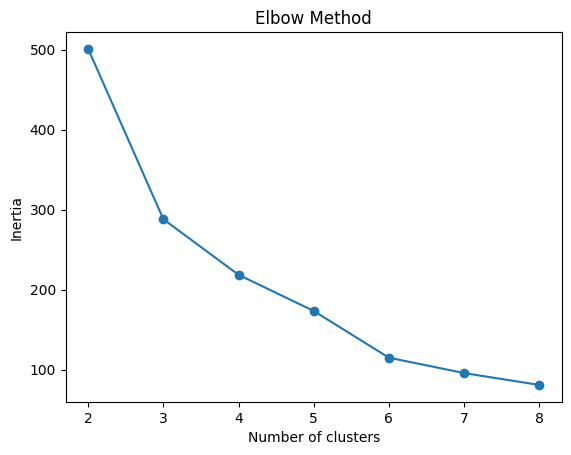

In [29]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertias = []
for k in range(2,9):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(dataset_scaled)
    inertias.append(kmeans.inertia_)

plt.plot(range(2, 9), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

### SILHOUETTE ANALYSIS

Silhouette Score for 2 clusters: 0.62
Silhouette Score for 3 clusters: 0.65
Silhouette Score for 4 clusters: 0.60
Silhouette Score for 5 clusters: 0.61
Silhouette Score for 6 clusters: 0.63
Silhouette Score for 7 clusters: 0.65
Silhouette Score for 8 clusters: 0.65


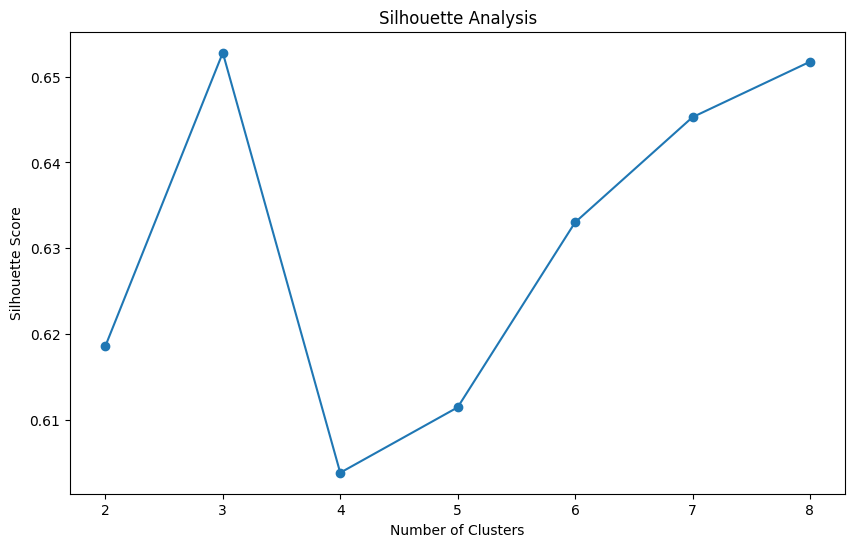

In [30]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

dataset_scaled = dataset_scaled.iloc[:, :3]

silhouette_scores = []
for num_clusters in range(2,9):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(dataset_scaled)
    silhouette_avg = silhouette_score(dataset_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Silhouette Score for {num_clusters} clusters: {silhouette_avg:.2f}")

plt.figure(figsize=(10, 6))
plt.plot(range(2,9), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()

<div style="background-color: #e0bbff; color: black; padding: 10px;">

- The Silhouette score is a metric used to evaluate how well a clustering algorithm performs. This score is the difference between the average distance of each point to other points in its cluster and the average distance to the nearest cluster center. The score takes values in the range [-1, 1], with positive values indicating a better clustering result and negative values indicating a poor result.

- After conducting experiments using the Elbow method and Silhouette analysis, I determined that the optimal number of clusters is 3. Despite experimenting with various cluster numbers, I noticed more heterogeneous distributions with other cluster numbers. Therefore, I set the k value to 3 for the k-Means algorithm as it provided the most meaningful results during further experimentation.

## k-MEANS

- Distribution of the data set in the 2D graph according to the K-Means clustering algorithm (n_cluster = 3)

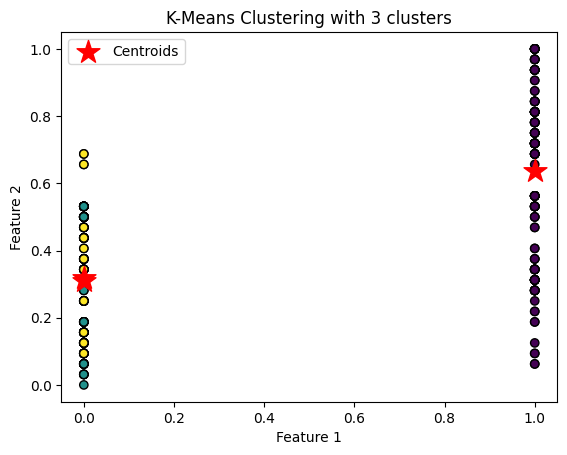

In [31]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)

cluster_labels = kmeans.fit_predict(dataset_scaled)

cluster_centers = kmeans.cluster_centers_

plt.scatter(dataset_scaled.iloc[:, 0], dataset_scaled.iloc[:, 1], c=cluster_labels, cmap='viridis', marker='o', edgecolor='k')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=300, c='red', marker='*', label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering with 3 clusters')
plt.legend()
plt.show()

- This visualization is useful for understanding how instances in the dataset are grouped in three-dimensional space and where each cluster is located.

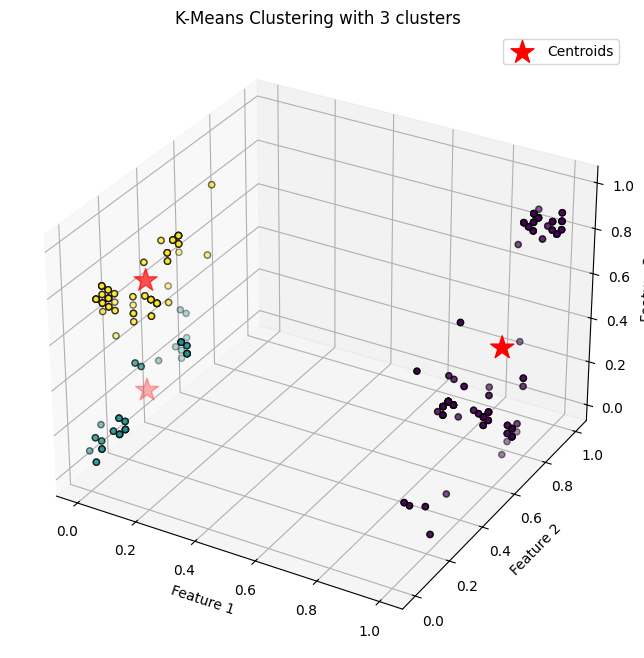

In [32]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(dataset_scaled.iloc[:, 0], dataset_scaled.iloc[:, 1], dataset_scaled.iloc[:, 2], c=cluster_labels, cmap='viridis', marker='o', edgecolor='k')
ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1], cluster_centers[:, 2], s=300, c='red', marker='*', label='Centroids')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('K-Means Clustering with 3 clusters')
plt.legend()
plt.show()

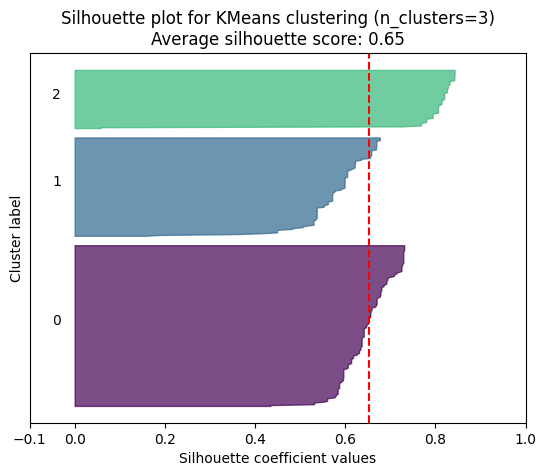

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

kmeans = KMeans(n_clusters=3)
cluster_labels = kmeans.fit_predict(dataset_scaled)

silhouette_vals = silhouette_samples(dataset_scaled, cluster_labels)

silhouette_avg = silhouette_score(dataset_scaled, cluster_labels)

y_lower = 10
fig, ax = plt.subplots()
for i in range(3):

    cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
    cluster_silhouette_vals.sort()
    cluster_size = cluster_silhouette_vals.shape[0]
    y_upper = y_lower + cluster_size
    color = plt.cm.viridis(float(i) / 3)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals,
                      facecolor=color, edgecolor=color, alpha=0.7)
    ax.text(-0.05, y_lower + 0.5 * cluster_size, str(i))
    y_lower = y_upper + 10

ax.set_xlabel("Silhouette coefficient values")
ax.set_ylabel("Cluster label")
ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_yticks([])
ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
plt.title(f"Silhouette plot for KMeans clustering (n_clusters=3)\n"
          f"Average silhouette score: {silhouette_avg:.2f}")
plt.show()

- The bar chart showing the size and distribution of clusters 

kmeans_label
0    116
1    189
2     69
dtype: int64


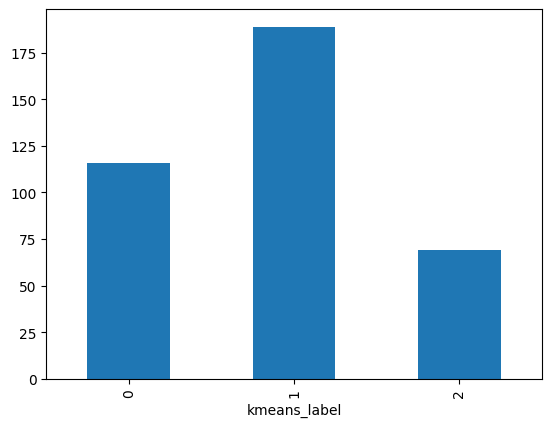

In [34]:
cluster_labels_kmeans = kmeans.fit_predict(dataset_scaled)
dataset_scaled["kmeans_label"] = cluster_labels_kmeans

k_means_cluster_size = dataset_scaled.groupby("kmeans_label").size()
k_means_cluster_size.plot.bar()
print(k_means_cluster_size)

<div style="background-color: #e0bbff; color: black; padding: 10px;">

**Final Result:** After comparing the results of the two clustering algorithms I tested, I ultimately selected the k-Means algorithm. Upon reviewing both two-dimensional and three-dimensional graphs, I noted that this algorithm yielded more homogeneous group distributions. Additionally, since I achieved the most logical outcomes by utilizing 3 clusters in my experiments and because I could specify the number of clusters in the k-Means algorithm, I considered this method advantageous.

<div style="background-color: #d3d3d3; color: black; padding: 10px;">
 
 # Task 7 - Dimensionality Reduction

## Principal Component Analysis (PCA)

Component 1: 0.61 explained variance ratio
Component 2: 0.32 explained variance ratio
Component 3: 0.05 explained variance ratio
Component 4: 0.03 explained variance ratio


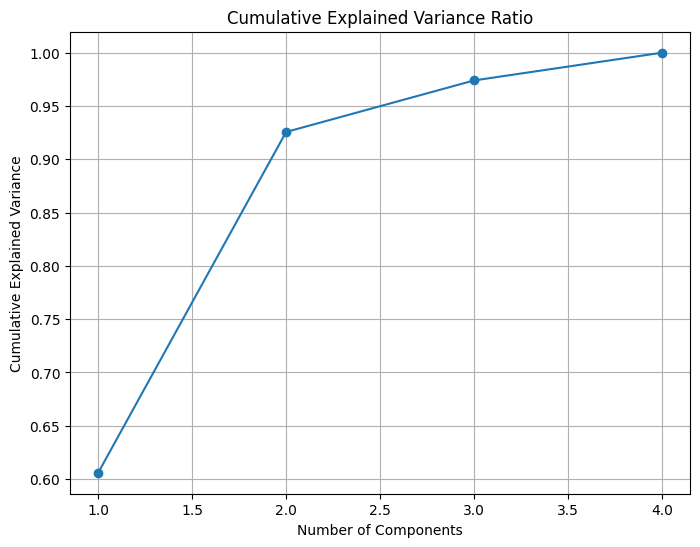

In [35]:
from sklearn.decomposition import PCA

# PCA application:
pca = PCA()
dataset_pca=pca.fit_transform(dataset_scaled)

# Review PCA results:
explained_variance = pca.explained_variance_ratio_

for i, var in enumerate(explained_variance):
    print(f"Component {i+1}: {var:.2f} explained variance ratio")


# Visualizing the cumulative sum
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
num_components = len(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, num_components + 1), cumulative_variance, marker='o', linestyle='-')
plt.title('Cumulative Explained Variance Ratio')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

<div style="background-color: #d3d3d3; color: black; padding: 10px;">

It is seen that the first two components explain a large portion of the total variance (%93). However, since the contribution of the third and fourth component are quite low, we can neglect these components. Using this information, I determined the appropriate number of components for dimension reduction as 2.

In [36]:
from sklearn.cluster import KMeans

pca = PCA(n_components=2)
dataset_pca = pca.fit_transform(dataset_scaled)

## k-MEANS with PCA

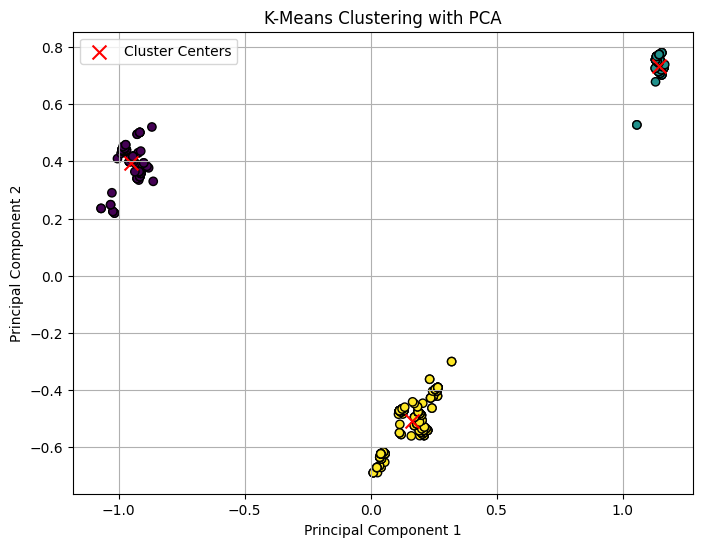

In [37]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels_pca = kmeans.fit_predict(dataset_pca)

cluster_centers = kmeans.cluster_centers_

plt.figure(figsize=(8, 6))
plt.scatter(dataset_pca[:, 0], dataset_pca[:, 1], c=cluster_labels_pca, cmap='viridis', marker='o', edgecolor='k')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=100, label='Cluster Centers')  
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering with PCA')
plt.legend()
plt.grid(True)
plt.show()

In [38]:
cluster_centers = kmeans.cluster_centers_

for i, center in enumerate(cluster_centers):
 
    print(f"Center of cluster {i+1}: {center}")
    
    cluster_points = dataset_pca[cluster_labels_pca == i]
    num_points = len(cluster_points)
    print(f"Number of points of cluster {i+1}: {num_points}")

Center of cluster 1: [-0.94901944  0.39345555]
Number of points of cluster 1: 116
Center of cluster 2: [1.14504164 0.7348636 ]
Number of points of cluster 2: 69
Center of cluster 3: [ 0.16443589 -0.50976948]
Number of points of cluster 3: 189


<div style="background-color: #d3d3d3; color: black; padding: 10px;">

I observed that the clustering (k-Means) results before applying PCA to the dataset and the clustering results after applying PCA were very similar. From this we can conclude that the PCA I applied preserved the structure of the dataset and retained important information. 

 <div style="background-color: #98FB98DC; color: black; padding: 10px;">
 
 # Task 8 - Cluster Interpretation

 <div style="background-color: #98FB98DC; color: black; padding: 10px;">

With PCA, I created a new feature space by summarizing the variability in the dataset. By using this new space and the k-Means clustering algorithm I applied in the previous step, I was able to re-represent the structure of the dataset. When I visualize the result of the operations, I can say that PCA contributed to obtaining a clearer clustering result by summarizing the variability in the dataset. Therefore, I chose the result that reached after applying PCA in Task 7.

When we examine the histogram graphs below: 

- “Age” factor shows a balanced distribution in all 3 clusters. It is possible to interpret that patients were not grouped according to large age differences during clustering.

- In the cluster of people with relatively high average "physical activity level", the average "heart rate" was lower than the other clusters. It is possible to infer that these two concepts are opposite to each other from the fact that they are concentrated in different clusters.

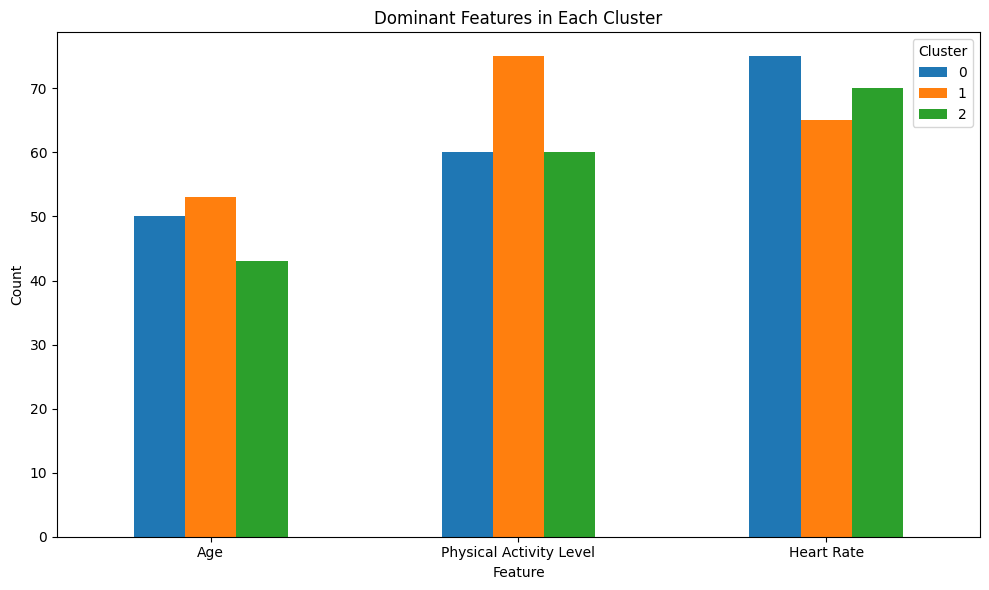

In [39]:
# Calculation of feature distributions in each cluster
selected_features_2 = ['Age', 'Physical Activity Level','Heart Rate']
cluster_counts = dataset.groupby(cluster_labels_pca)[selected_features_2].apply(lambda x: x.mode().iloc[0])

plt.figure(figsize=(10, 6))
cluster_counts.T.plot(kind='bar', ax=plt.gca())
plt.xlabel('Feature')
plt.ylabel('Count')
plt.title('Dominant Features in Each Cluster')
plt.xticks(rotation=0)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

In the graphs below, I have examined in detail the two variables that are positively and negatively affected by sleep quality. 

- Correlation analysis in task 5, I observed a strong positive correlation between sleep quality and sleep duration. As can be seen in the graphs, similar mean values were observed for these two variables in the same clusters. 

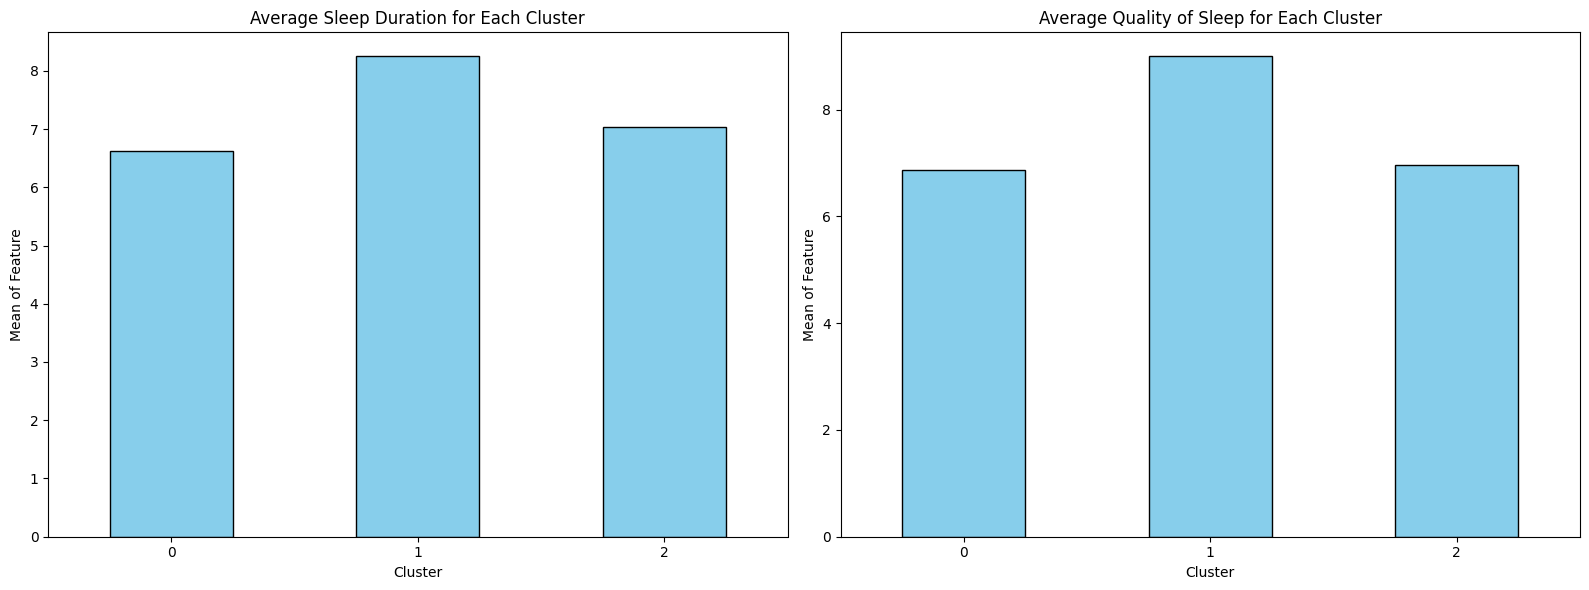

In [40]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

selected_features = ['Sleep Duration', 'Quality of Sleep']

for i, selected_feature in enumerate(selected_features):

    cluster_means = dataset.groupby(cluster_labels_pca)[selected_feature].mean()

    cluster_means.plot(kind='bar', color='skyblue', edgecolor='black', ax=axes[i])
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel('Mean of Feature')
    axes[i].set_title(f'Average {selected_feature} for Each Cluster')
    axes[i].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

- In the graphs below, I examined the clusters for the two variables with a strong negative correlation in the correlation analysis. In the cluster where the average stress level was observed to be low, the average sleep quality was observed to be high. 


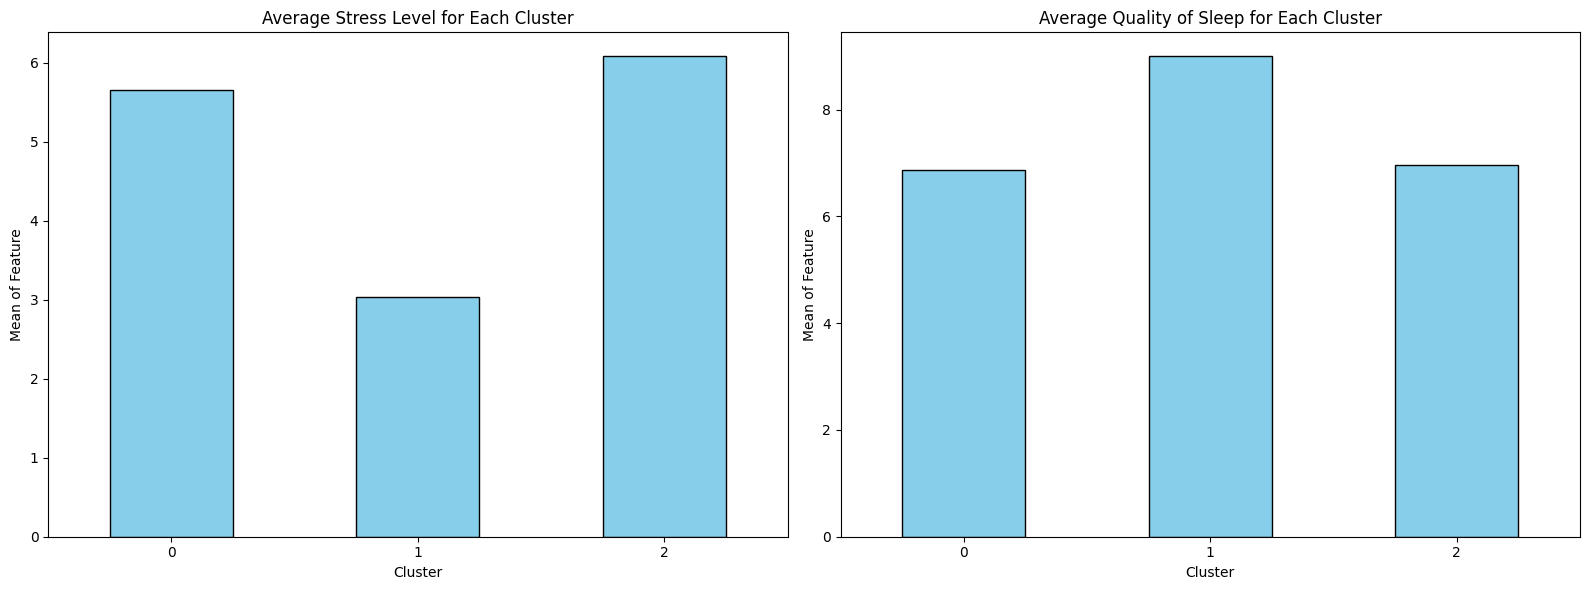

In [41]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

selected_features = ['Stress Level', 'Quality of Sleep']

for i, selected_feature in enumerate(selected_features):
   
    cluster_means = dataset.groupby(cluster_labels_pca)[selected_feature].mean()

    cluster_means.plot(kind='bar', color='skyblue', edgecolor='black', ax=axes[i])
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel('Mean of Feature')
    axes[i].set_title(f'Average {selected_feature} for Each Cluster')
    axes[i].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

 <div style="background-color: #98FB98DC; color: black; padding: 10px;">

These observations suggest that the parameters determined during the clustering process were appropriately distributed among the clusters within a logical framework. This implies that the relationships between sleep quality and other variables were accurately captured by the clustering algorithm, yielding meaningful results.

<div style="background-color: #FFFFFF; color: black; padding: 11px;">

 # Task 9 - Conclusions and Future Work

**1.**
First of all, after making the data set analyzable, I reached a conclusion by using various algorithms and analysis methods. After clustering the data of 374 patients with the help of certain parameters, I examined the characteristics of these clusters. I saw that while some features predominate in the clusters created, some features show a balanced distribution. I can say that it is possible to analyze which data is important for this project from these results.

**2. & 3. & 4.**
The relationship between the factors that directly or indirectly affect sleep health has been examined in detail through this analysis. According to the results I have reached, I would like to emphasize that some determining factors should be considered when preparing the content of the training package. For example, patients' occupational groups, daily physical activity levels and weight... These 3 factors are closely related to each other and are closely related to sleep quality. In addition, I can say that factors such as heart rate and blood pressure, which are indirectly affected by these factors, are also determinants of sleep quality. It is possible to see from the results that the other 2 factors that directly affect sleep quality are sleep duration and stress level. It will be necessary to include more detailed explanations for the factors that have a direct effect in the education package. At the beginning of the project, I thought that it would be right to prepare different training packages for different age groups, but I observed that age was not among the most determining factors in the results (Task 8) I reached . It seems that it would be more accurate to emphasize the importance of daily life routines rather than age. I believe that the results of the analysis are guiding in order to prepare the education package with the most appropriate content.

**5.**
One detail that I noticed during the data analysis is that while the vast majority of nurses have sleep disorders, some occupational groups do not have any sleep disorders at all. Such a large difference between occupational groups in the dataset may lead to misleading results. 

I had to convert some categorical data (Gender, Sleep Disorder, BMI Category) into numerical data with the custom mapping method. I wanted to include these columns, which I think are very important for the analysis and results. Although it is risky, I used this method because it seemed riskier to me not to include these features at all.

**6.**
Performing PCA before clustering could have been a guiding factor for choosing a different clustering method (DBSCAN). When I applied the DBSCAN clustering algorithm to the dataset after performing PCA, it would have been possible to reduce the possibility of encountering outliers. With this method, a different perspective for the project could have been experienced. Also, determining the number of clusters while applying k-Means was difficult for me due to the high number of features. For this reason, I had to manually intervene in the number of features while performing silhouette analysis. Applying k-Means after PCA could have eliminated the need for this intervention.

**7.**
Exploring additional features or transformations of existing features that may better capture the underlying structure of the data. This can be useful for creating new meaningful features or applying mathematical transformations to existing features.

By focusing on this specific area for future work, the project can gain deeper insights into the data, improve clustering performance, and potentially uncover hidden patterns or relationships that were not previously apparent.

